In [1]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [2]:
using Revise
includet("./base.jl")

In [3]:
using GLMakie
using CairoMakie
CairoMakie.activate!()

In [4]:
import DataFrames: metadata as md

In [5]:
includet("../../../scripts/figures_util.jl")

# V3

In [28]:
@time xx = find_nospace_multistability(20, 3, 2;
    num_params=1000,
    num_solves=20,
);

Progress: 100%|█████████████████████████████████████████| Time: 0:01:30


 90.523507 seconds (59.39 M allocations: 17.402 GiB, 1.45% gc time, 1.26% compilation time)


In [32]:
countmap(xx.numdistsss)

Dict{Int64, Int64} with 1 entry:
  1 => 1000

In [33]:
using Graphs

In [35]:
g = DiGraph(5)

{5, 0} directed simple Int64 graph

In [37]:
?add_edge!

search: add_edge! add_edge_checked!



```
add_edge!(g, e)
```

Add an edge `e` to graph `g`. Return `true` if edge was added successfully, otherwise return `false`.

# Examples

```jldoctest
julia> using Graphs

julia> g = SimpleGraph(2);

julia> add_edge!(g, 1, 2)
true

julia> add_edge!(g, 2, 3)
false
```

---

```
add_edge!(meta_graph, label_1, label_2, data)
```

Add an edge `(label_1, label_2)` to MetaGraph `meta_graph` with metadata `data`. If the `EdgeData` type of `meta_graph` is `Nothing`, `data` can be omitted.

Return `true` if the edge has been added, `false` otherwise. If one of the labels does not exist, nothing happens and `false` is returned (the label is not inserted). If `(label_1, label_2)` already exists, its data is updated to `data` and `false` is returned nonetheless.


# V1

In [223]:
@time xx = kaka(10, 10);
@show maximum(xx.maxresids)
countmap(xx.retcodes)

numsurv = 0
numsurv = 0
numsurv = 0
numsurv = 3
numsurv = 0
numsurv = 0
numsurv = 0
numsurv = 0
numsurv = 2
numsurv = 0
numsurv = 0
numsurv = 0
numsurv = 0
numsurv = 0
numsurv = 0
numsurv = 0
numsurv = 0
numsurv = 1
numsurv = 0
numsurv = 0
  0.108652 seconds (102.13 k allocations: 12.706 MiB, 676.05% compilation time)
maximum(xx.maxresids) = 8.734718527199804e-10


Dict{SciMLBase.ReturnCode.T, Int64} with 1 entry:
  Success => 20

In [220]:
N = 10
logKs = range(0.5, 1.5, 30)

faf = []
for logK in logKs
    K = 10 ^ logK
    xx = kaka(N, K)
    yy = map(xx.steadystates) do ss
        count(ss[1:N]) do x
            x > 1e-9
        end
    end
    zz = count(yy) do x
        x > 0
    end
    push!(faf, 20 - zz)
end

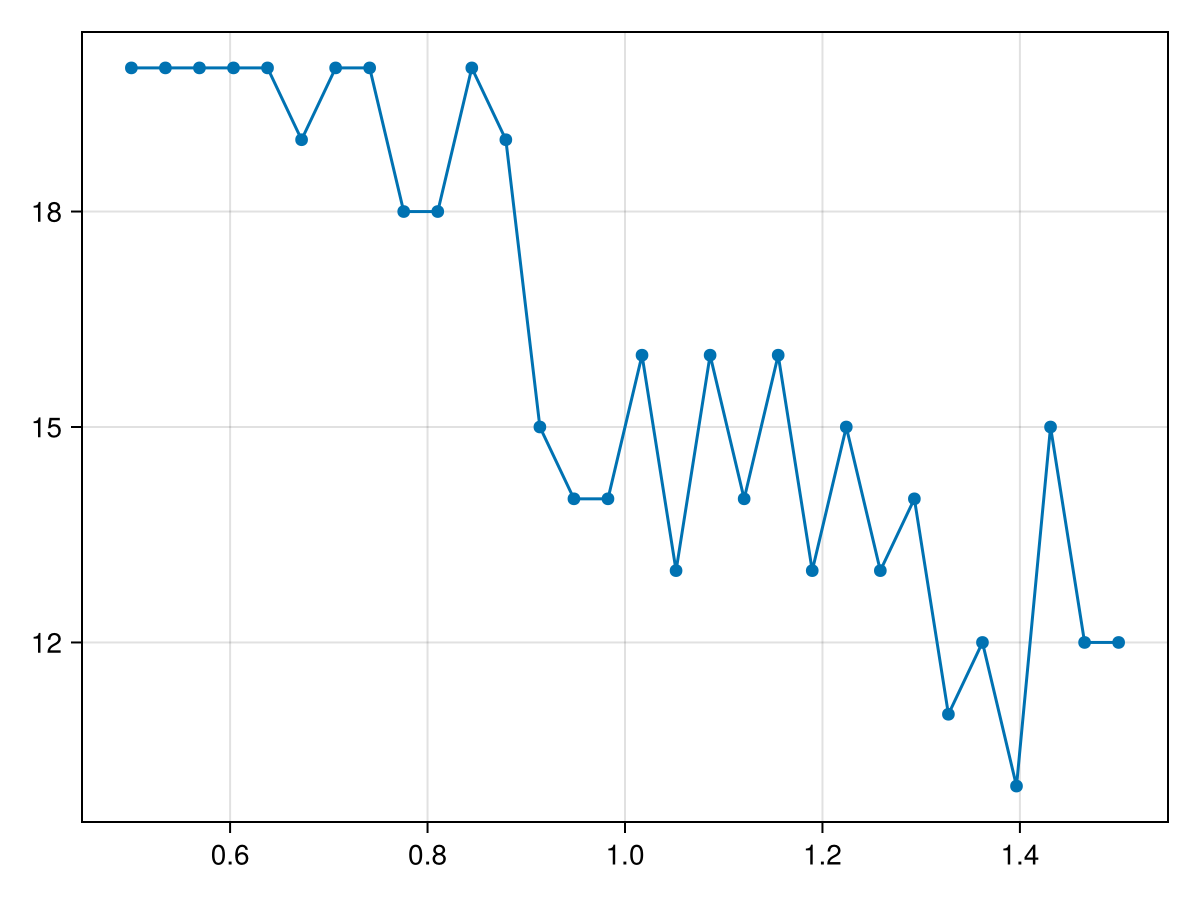

In [206]:
scatterlines(logKs, faf)

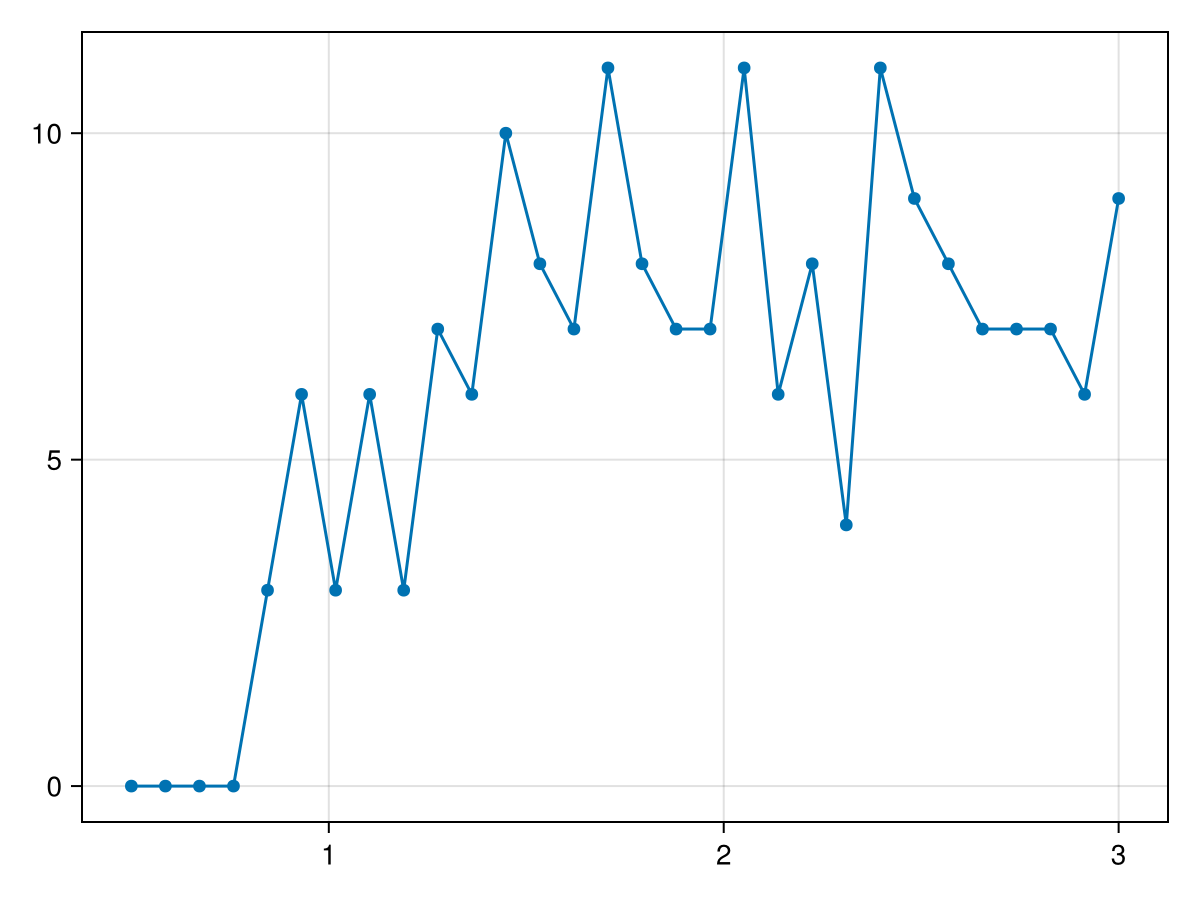

In [188]:
scatterlines(logKs, faf)

# V2

## Setup

In [221]:
function plot_binom_sample!(ax, xs, ns, num_repeats;
    label="",
    proportions=false,
    kwargs...
)
    if isa(num_repeats, Number)
        num_repeats = fill(num_repeats, length(ns))
    end

    xx = if proportions
        ns ./ num_repeats
    else
        ns
    end
    sl = scatterlines!(ax, xs, xx;
        label,
        kwargs...
    )

    mins = Float64[]
    maxs = Float64[]
    @show proportions
    for (n, nrs) in zip(ns, num_repeats)
        bt = BinomialTest(n, nrs)
        ci = confint(bt; method=:wilson)
        if proportions
            push!(mins, ci[1])
            push!(maxs, ci[2])
        else
            push!(mins, ci[1] * nrs)
            push!(maxs, ci[2] * nrs)
        end
    end

    b = band!(ax, xs, mins, maxs;
        alpha=0.5,
        kwargs...
    )

    (sl, b)
end

function plot_cdf1!(ax, cdf; include_bad=true, proportions=false)
    goodruns = cdf.num_runs .- cdf.bad_ss .- cdf.good_ss_bad_ls
    p1 = plot_binom_sample!(ax, cdf.K, cdf.extinct, goodruns;
        label="extinct",
        color=PaperColors.extinct1(),
        proportions
    )
    # lsruns = cdf.num_runs .- cdf.bad_ss .- cdf.extinct
    p2 = plot_binom_sample!(ax, cdf.K, cdf.nonext_unstable, goodruns;
        label="unstable",
        color=PaperColors.unstable1(),
        proportions
    )
    p3 = plot_binom_sample!(ax, cdf.K, cdf.nonext_stable, goodruns;
        label="stable",
        color=PaperColors.stable1(),
        proportions
    )
    if include_bad
        p3 = plot_binom_sample!(ax, cdf.K, cdf.bad_ss .+ cdf.good_ss_bad_ls, cdf.num_runs;
            label="bad data",
            color=PaperColors.other(),
            proportions
        )
    end
    (p1, p2, p3)
end
function plot_cdf1(cdf; kwargs...)
    f = Figure()
    ax = Axis(f[1, 1];
        xlabel="K",
        xscale=log10,
    )
    p = plot_cdf1!(ax, cdf; kwargs...)
    axislegend(ax)
    FigureAxisAnything(f, ax, p)
end

function plot_df1(df)
    f = Figure(;
    # size=(800, 500)
    )

    ax_biom = Axis(f[1, 1:2];
        ylabel="HSS biomass",
        yscale=Makie.pseudolog10,
        # yscale=Makie.log10,
        xscale=log10,
    )
    ax2 = Axis(f[2, :];
        ylabel="observed MRL",
        xscale=log10,
    )
    ax3 = Axis(f[3, :];
        ylabel="MRL at K=0",
        xscale=log10,
    )
    ax4 = Axis(f[4, 1];
        ylabel="Counts",
        xscale=log10,
    )
    linkxaxes!(ax_biom, ax4)
    linkxaxes!(ax2, ax4)
    linkxaxes!(ax2, ax4)
    for ax in [ax_biom, ax2, ax3]
        hidexdecorations!(ax;
            grid=false,
            ticks=false,
        )
    end
    ax4.xlabel = "K"

    xx = @subset df :good_ss
    # scatter!(ax_biom, xx.K, clamp.(xx.hss_biomass, 1e-20, Inf))
    scatter!(ax_biom, xx.K, xx.hss_biomass)

    scatter!(ax2, xx.K, xx.maxmrl)
    maxmaxmrl = maximum(xx.maxmrl)
    ylims!(ax2, (-1.1, 1.1) .* abs(maxmaxmrl))
    text!(ax2, 0.05, 0.75;
        text=(@sprintf "max is %.5g" maxmaxmrl),
        space=:relative,
    )

    scatter!(ax3, xx.K, xx.k0mrl)
    maxk0mrl = maximum(xx.k0mrl)
    ylims!(ax3, (-1.1, 1.1) .* abs(maxk0mrl))
    text!(ax3, 0.05, 0.75;
        text=(@sprintf "max is %.5g" maxk0mrl),
        space=:relative,
    )

    # display(GLMakie.Screen(), f)

    rowgap!(f.layout, 1.0)
    plot_cdf1!(ax4, make_counts_df(df))
    # axislegend(ax4; position=:lc)
    Legend(f[4, 2], ax4; padding=0.0)

    f
end

plot_df1 (generic function with 1 method)

## Rest

In [215]:
N = M = 10
B = 3
Ks = 10 .^ range(0.5, 1.5, 5)

df, cms = do_df_run(Ks, N;
    M,
    # pei=1.,
    pei=(B / M),
    linflux=1.,
    cinflux=1.0,
    pe=(B / M),
    l=0.0,
    c=1.0,
    # num_byproducts=B,
    num_byproducts=Binomial(M, B / M),
    num_repeats=20,
    lsks=10 .^ range(-5, 3, 2000),
);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:11


countmap(df.sscode) = Dict(2 => 74, 1 => 26)
countmap(df.lscode) = Dict{Union{Missing, Int64}, Int64}(22 => 1, 2 => 9, 12 => 16, 1 => 74)
count($(Expr(:.&&, :(df.good_ss), :(df.good_ls)))) / nrow(df) = 0.83
prop_good_ss_and_ls = 0.83


In [216]:
cdf = make_counts_df(df);

proportions = false
proportions = false
proportions = false


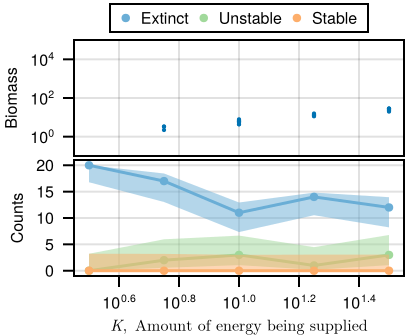

In [217]:
fig = Figure(;
    size=(double_col_width * 0.3, (double_col_width / golden_ratio) * 0.4),
    default_fig_kwargs...,
    # figure_padding=(2., 2., 2., 2.)
)

bm_yy = [0, 2, 4]
bm_ax = Axis(fig[1,1];
    xscale=log10,
    yscale=log10,
    yticks=(10. .^ bm_yy, [rich("10", superscript(string(e))) for e in bm_yy]),
    ylabel="Biomass"
)
props_ax = Axis(fig[2,1];
    xscale=log10,
    xlabel=L"K,\enspace\text{Amount of energy being supplied}",
    ylabel="Counts"
)
linkxaxes!(bm_ax, props_ax)
hidexdecorations!(bm_ax; grid=false)

hbs = df.hss_biomass
hbs = clamp.(hbs, minimum(abs, hbs), Inf)
scatter!(bm_ax, df.K, hbs;
    markersize=3,
)
ylims!(bm_ax, 1e-1, 1e5)

plot_cdf1!(props_ax, cdf; include_bad=false)

Legend(fig[-1,1],
    [
        MarkerElement(; marker=:circle, color=PaperColors.extinct1()),
        MarkerElement(; marker=:circle, color=PaperColors.unstable1()),
        MarkerElement(; marker=:circle, color=PaperColors.stable1()),
    ],
    ["Extinct", "Unstable", "Stable"];
    orientation=:horizontal,
    padding=(0., 5., 0., 0.),
    patchlabelgap=0.,
    patchsize=(15, 15),
    colgap=0.,
)

rowsize!(fig.layout, 0, Relative(0.000))
rowgap!(fig.layout, 2, -15.)
rowgap!(fig.layout, 3, 2.)

# Makie.save("../../figures/fig1/li1_props.pdf", fig)

fig